In [187]:
#14/01/2022
#pyTorch intro
#https://www.youtube.com/watch?v=kPa6hU9prg4&list=PL_iWQOsE6TfXxKgI1GgyV1B_Xa0DxE5eH&index=13
#https://www.youtube.com/watch?v=ubSsUJbLkwM&list=PL_iWQOsE6TfXxKgI1GgyV1B_Xa0DxE5eH&index=13

In [188]:
import matplotlib.pyplot as plt
import torch
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as distributions
import torch.nn.functional as F

def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')
  
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

In [189]:
x=torch.zeros(2,3)
y=torch.ones(2,3)
z=x+y
print(x)
print(y)
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [190]:
print(torch.sum(z,dim=1))
print(torch.sum(z,dim=0))

tensor([3., 3.])
tensor([2., 2., 2.])


In [191]:
x=torch.ones((3,1))
y=torch.ones((1,3))
z=x+y
print(x)
print(y)
print(z)

tensor([[1.],
        [1.],
        [1.]])
tensor([[1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [192]:
x_np=np.random.randn(2,3)
print(x_np)

[[ 0.16480657  0.27500238  0.21460634]
 [-1.13656159  1.14621422 -0.10024596]]


In [193]:
x=torch.from_numpy(x_np)
print(x)

tensor([[ 0.1648,  0.2750,  0.2146],
        [-1.1366,  1.1462, -0.1002]], dtype=torch.float64)


In [194]:
x_np[0,0]=0
print(x)

tensor([[ 0.0000,  0.2750,  0.2146],
        [-1.1366,  1.1462, -0.1002]], dtype=torch.float64)


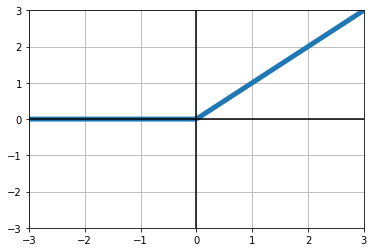

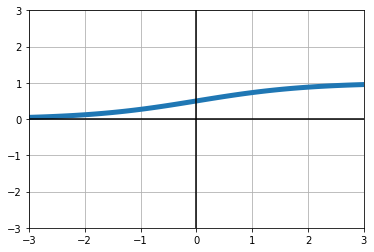

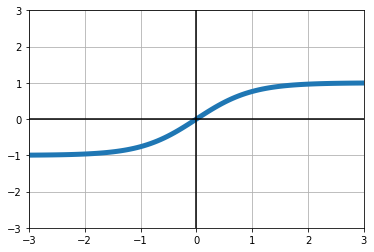

In [195]:
xs=torch.linspace(-3,3,100)
ys=torch.relu(xs)
plot(xs.numpy(),ys.numpy())
ys=torch.sigmoid(xs)
plot(xs.numpy(),ys.numpy())
ys=torch.tanh(xs)
plot(xs.numpy(),ys.numpy())

In [196]:
x=torch.Tensor(([2,3.5],[4,4]))
torch.softmax(x,dim=-1)# Do softmax along last dimension (by row)

tensor([[0.1824, 0.8176],
        [0.5000, 0.5000]])

In [197]:
shape=(3,)
x=torch.tensor([1.0,2,3],requires_grad=True)
y=torch.ones(shape,requires_grad=True)

In [198]:
x.data

tensor([1., 2., 3.])

In [199]:
print(x.grad)

None


In [200]:
loss=((2*x+y)**2).sum()
print(loss)

tensor(83., grad_fn=<SumBackward0>)


In [201]:
grad_fns=[(loss.grad_fn,0)]
curr_level=0
lines=[]
while grad_fns:
    prev_level=curr_level
    fn,curr_level=grad_fns.pop()
    if curr_level!=prev_level:
        print("----")
    print(fn.name())
    for next_fn,_ in fn.next_functions:
        if next_fn:
            grad_fns.append((next_fn,curr_level+1))

SumBackward0
----
PowBackward0
----
AddBackward0
----
torch::autograd::AccumulateGrad
MulBackward0
----
torch::autograd::AccumulateGrad


In [202]:
loss.backward()

In [203]:
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
tensor([ 6., 10., 14.])


In [204]:
loss=((2*x+y)**2).sum()
loss.backward()

In [205]:
print(x.grad)
print(y.grad)

tensor([24., 40., 56.])
tensor([12., 20., 28.])


In [206]:
other_loss=(x**2).sum()
other_loss.backward()

In [207]:
print(x.grad)
print(y.grad)

tensor([26., 44., 62.])
tensor([12., 20., 28.])


In [208]:
shape=(3,)
x=torch.tensor([1.,2,3],requires_grad=True)
y=torch.ones(shape)
loss=((2*x+y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
None


In [209]:
shape=(3,)
x=torch.tensor([1.,2,3],requires_grad=True)
y=torch.ones(shape)
y.requires_grad=True
y_detached=y.detach()# actually it shares memory
loss=((2*x+y)**2).sum()
loss.backward()
print(x.grad)
print(y_detached.grad)
print(y.grad)

tensor([12., 20., 28.])
None
tensor([ 6., 10., 14.])


In [210]:
y.detach().clone() # it is actually a copy no memory shared

tensor([1., 1., 1.])

torch.Size([100, 1])


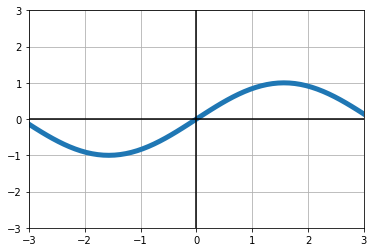

In [211]:
x=torch.linspace(-5,5,100).view(100,1)
print(x.shape)
y_target=torch.sin(x)
loss_fn=nn.MSELoss()
plot(x,y_target)

In [212]:
class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.fc1=nn.Linear(input_size,32)
        self.fc2=nn.Linear(32,32)
        self.fc3=nn.Linear(32,output_size)
    def forward(self,x):
        h1=F.relu(self.fc1(x))
        h2=F.relu(self.fc2(h1))
        y=self.fc3(h2)
        return y

In [213]:
net=Net(input_size=1,output_size=1)
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [214]:
y=net(x)
print(y.shape)

torch.Size([100, 1])


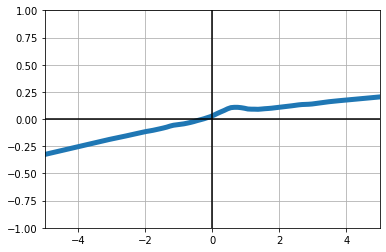

In [215]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [216]:
for name,p in net.named_parameters():
    print(name,p.shape)

fc1.weight torch.Size([32, 1])
fc1.bias torch.Size([32])
fc2.weight torch.Size([32, 32])
fc2.bias torch.Size([32])
fc3.weight torch.Size([1, 32])
fc3.bias torch.Size([1])


In [217]:
print(net.fc1.bias.grad)

None


In [218]:
loss=((y-y_target)**2).sum()

In [219]:
loss.backward()

In [220]:
for p in net.parameters():
    p.data.add(-0.001*p.grad)
    p.grad.data.zero_()

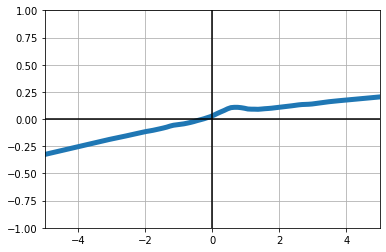

In [221]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [222]:
for _ in range(100):
    y=net(x)
    loss=((y-y_target)**2).sum()
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001*p.grad)
        p.grad.data.zero_()

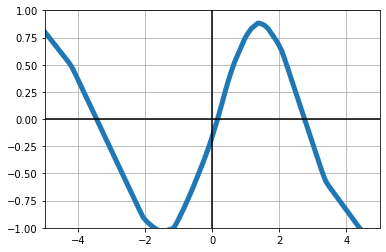

In [223]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [224]:
loss_fn=nn.MSELoss()
loss_fn(torch.Tensor([1.4,3.3,1.9]),torch.Tensor([1,3,2]))

tensor(0.0867)

In [225]:
net=Net(input_size=1,output_size=1)
for _ in range(1000):
    y=net(x)
    loss=loss_fn(y,y_target)
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001*p.grad)
        p.grad.data.zero_()

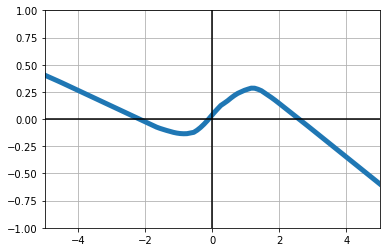

In [226]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [227]:
net=Net(input_size=1,output_size=1)
optimizer=optim.Adam(net.parameters(),lr=1e-3)

x=torch.linspace(-5,5,100).view(100,1)
y=net(x)
y_target=torch.sin(x)
loss_fn=nn.MSELoss()

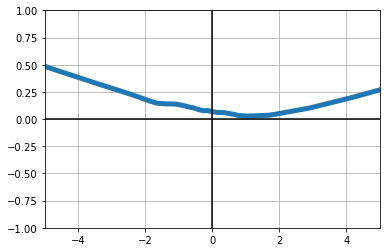

In [228]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [229]:
for _ in range(100):
    y=net(x)
    loss=loss_fn(y,y_target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

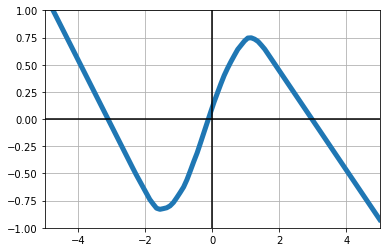

In [230]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [231]:
print(torch.cuda.is_available())

True


In [232]:
device=torch.device("cuda")
y=torch.ones((2,3),device=device)
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [233]:
device=torch.device("cuda")
x=torch.zeros((2,3))
y=torch.ones((2,3),device=device)
x=x.to(device)
z=x+y
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [234]:
z.numpy()

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [235]:
z_cpu=z.to("cpu")
z_cpu.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [236]:
mean=torch.zeros(1,requires_grad=True)
std=torch.ones(1,requires_grad=True)
gaussian=distributions.Normal(mean,std)

In [237]:
samples=gaussian.sample((10,))
print(samples)

tensor([[-1.1572],
        [-0.0663],
        [-1.0275],
        [-1.2524],
        [ 0.1197],
        [-0.5502],
        [-1.5589],
        [-0.6246],
        [ 0.8434],
        [ 1.0737]])


In [238]:
log_prob=gaussian.log_prob(samples)
print(log_prob)

tensor([[-1.5885],
        [-0.9211],
        [-1.4468],
        [-1.7032],
        [-0.9261],
        [-1.0703],
        [-2.1340],
        [-1.1140],
        [-1.2746],
        [-1.4954]], grad_fn=<SubBackward0>)


In [239]:
loss=-log_prob.sum()

In [240]:
print(loss)

tensor(13.6741, grad_fn=<NegBackward>)


In [241]:
loss.backward()

In [242]:
print(std.grad)
print(mean.grad)

tensor([1.0306])
tensor([4.2003])


In [243]:
probs=torch.tensor([0.1,0.2,0.7],requires_grad=True)

In [244]:
dist=distributions.Categorical(probs=probs)

In [245]:
samples=dist.sample([20])
print(samples)

tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [246]:
dist.log_prob(samples)

tensor([-1.6094, -0.3567, -0.3567, -1.6094, -0.3567, -0.3567, -0.3567, -0.3567,
        -0.3567, -2.3026, -0.3567, -0.3567, -0.3567, -0.3567, -0.3567, -0.3567,
        -0.3567, -0.3567, -0.3567, -0.3567], grad_fn=<SqueezeBackward1>)

In [252]:
class GaussianPolicy(nn.Module):
    def __init__(self,input_size, output_size):
        super(GaussianPolicy,self).__init__()
        self.mean_fc1=nn.Linear(input_size,32)
        self.mean_fc2=nn.Linear(32,32)
        self.mean_fc3=nn.Linear(32,output_size)
        self.log_std=nn.Parameter(torch.rand(output_size))
    def forward(self,x):
        h1=F.relu(self.mean_fc1(x))
        h2=F.relu(self.mean_fc2(h1))
        mean=self.mean_fc3(h2)
        return mean,self.log_std

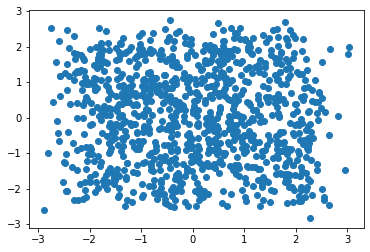

In [253]:
states=torch.rand(1000,2)-0.5
true_means=states**3+4.5*states
true_cov=torch.diag(torch.Tensor([0.1,0.05]))
expert_actions=torch.distributions.MultivariateNormal(true_means,true_cov).sample()
plt.scatter(expert_actions[:,0],expert_actions[:,1])

In [270]:
from torch.utils.data import DataLoader, TensorDataset
policy=GaussianPolicy(2,2)
optimizer=optim.Adam(policy.parameters(),lr=0.01)
dataset=TensorDataset(states,expert_actions)
loader=DataLoader(dataset,batch_size=64,shuffle=True)

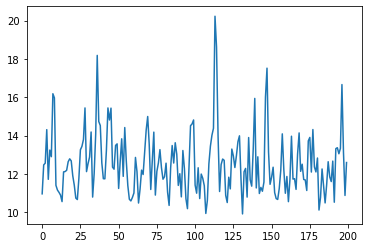

In [271]:
losses=[]
for epoch in range(200):
    epoch_loss=0
    for curr_states, curr_actions in loader:
        mean, log_std=policy(curr_states)
        dist=torch.distributions.Normal(mean,torch.exp(log_std))
        loss=-dist.log_prob(curr_actions).sum()
        
        optimizer.zero_grad()
        loss.backward()
        epoch_loss+=loss.detach().cpu().numpy().squeeze()
        optimizer.step()
    losses.append(epoch_loss/len(loader))
plt.plot(losses)

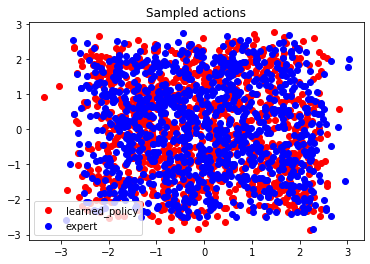

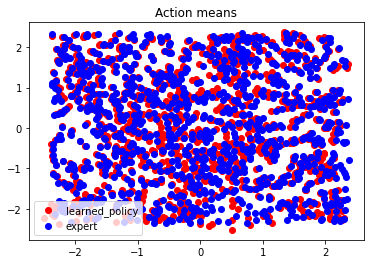

In [272]:
policy.eval()
with torch.no_grad():
    mean, log_std=policy(states)
    dist=torch.distributions.Normal(mean,torch.exp(log_std))
    pred_means=dist.mean.cpu().numpy()
    pred_actions=dist.sample().cpu().numpy()
plt.figure()
plt.title("Sampled actions")
plt.scatter(pred_actions[:,0],pred_actions[:,1],color="r",label="learned_policy")
plt.scatter(expert_actions[:,0],expert_actions[:,1],color="b",label="expert")
plt.legend()
plt.figure()
plt.title("Action means")
plt.scatter(pred_means[:,0],pred_means[:,1],color="r",label="learned_policy")
plt.scatter(true_means[:,0],true_means[:,1],color="b",label="expert")
plt.legend()
                            